## Model Perfromance Metrics Notebook
### Christopher V. Cosgriff, MPH
#### Harvard Chan School, NYU School of Medicine
<hr />

In this notebook we will examine the discrimination and calibration of the models we developed in the control and high-risk cohorts. Discrimination will be examined via area under the reciever-operator characteristic curve (AUC). Calibration will be examined via reliability curves and observed-to-predicted mortality ratios. Metrics will have conservative 95% confidence intervals constructed via bootstrapping. The functions for generating the graphics and metrics may be found in `modelanalysis`.

## 0 - Environement

In [1]:
import pandas as pd
import pickle
from modelanalysis import gen_auc_plot, gen_calib_plot, op_ratio, tableau20

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1 - Models and Data

We first load up the fully trained models.

In [2]:
ridge_classifier = pickle.load(open('./models/ridge_full-cohort', 'rb'))
ridge_classifier_HR = pickle.load(open('./models/ridge_HR-cohort', 'rb'))
xgb_classifier = pickle.load(open('./models/xgb_full-cohort', 'rb'))
xgb_classifier_HR = pickle.load(open('./models/xgb_HR-cohort', 'rb'))

We then load up the testing data and generate high-risk testing cohort.

In [3]:
test_X = pd.read_csv('../extraction/data/test_X.csv').set_index('patientunitstayid').values
test_y = pd.read_csv('../extraction/data/test_y.csv').values.ravel()
test_apache = pd.read_csv('../extraction/data/test_apache.csv').values.ravel()

test_X_HR = test_X[(test_apache >= 0.10), :]
test_y_HR = test_y[test_apache >= 0.10]

## 2 - Models Fit in the Control Cohort

Here we will examine how the models trained in the RS cohort perform in a cohort composed of only high-risk patients.

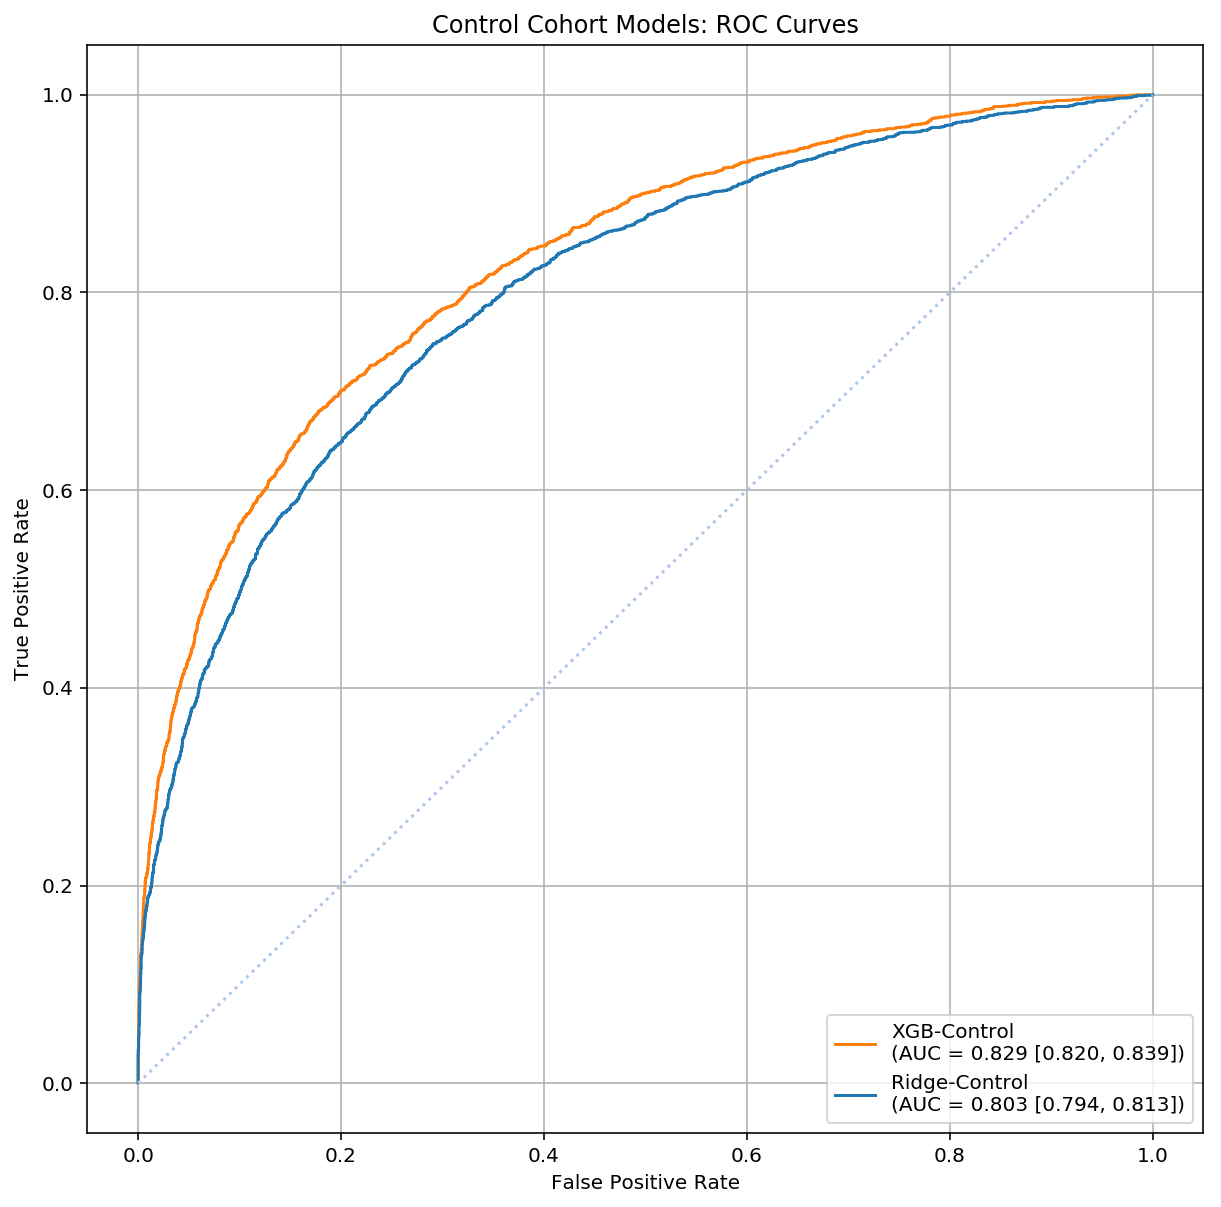

In [4]:
gen_auc_plot(models=[xgb_classifier, ridge_classifier], names=['XGB-Control', 'Ridge-Control'], 
             colors=[tableau20[2], tableau20[0]], title='Control Cohort Models: ROC Curves', X=test_X_HR, 
             y=test_y_HR, save_name='roc_Control')

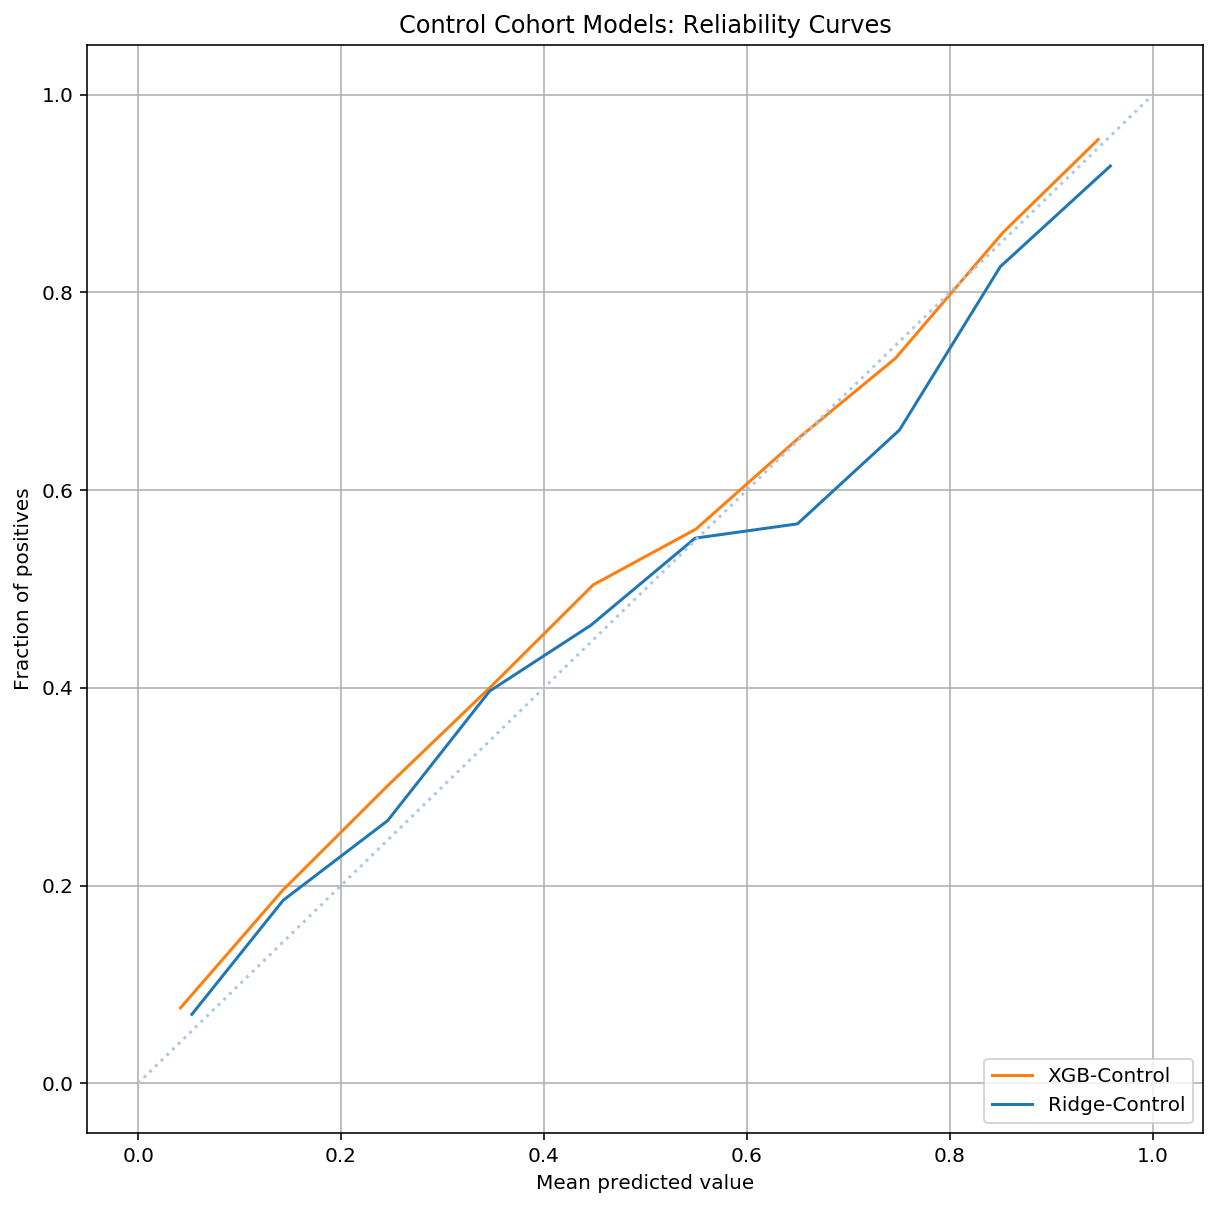

In [5]:
gen_calib_plot(models=[xgb_classifier, ridge_classifier], names=['XGB-Control', 'Ridge-Control'], 
             colors=[tableau20[2], tableau20[0]], title='Control Cohort Models: Reliability Curves', 
               X=test_X_HR, y=test_y_HR, save_name='rel_Control')

In [6]:
print('Ridge-Control OPR: {0:.3f} [{1:.3f}, {2:.3f}]'.format(*op_ratio(ridge_classifier, test_X_HR, test_y_HR)))
print('XGB-Control OPR: {0:.3f} [{1:.3f}, {2:.3f}]'.format(*op_ratio(xgb_classifier, test_X_HR, test_y_HR)))

Ridge-Control OPR: 1.087 [1.055, 1.121]
XGB-Control OPR: 1.197 [1.162, 1.232]


## 3 - Models Fit in the High-risk Cohort

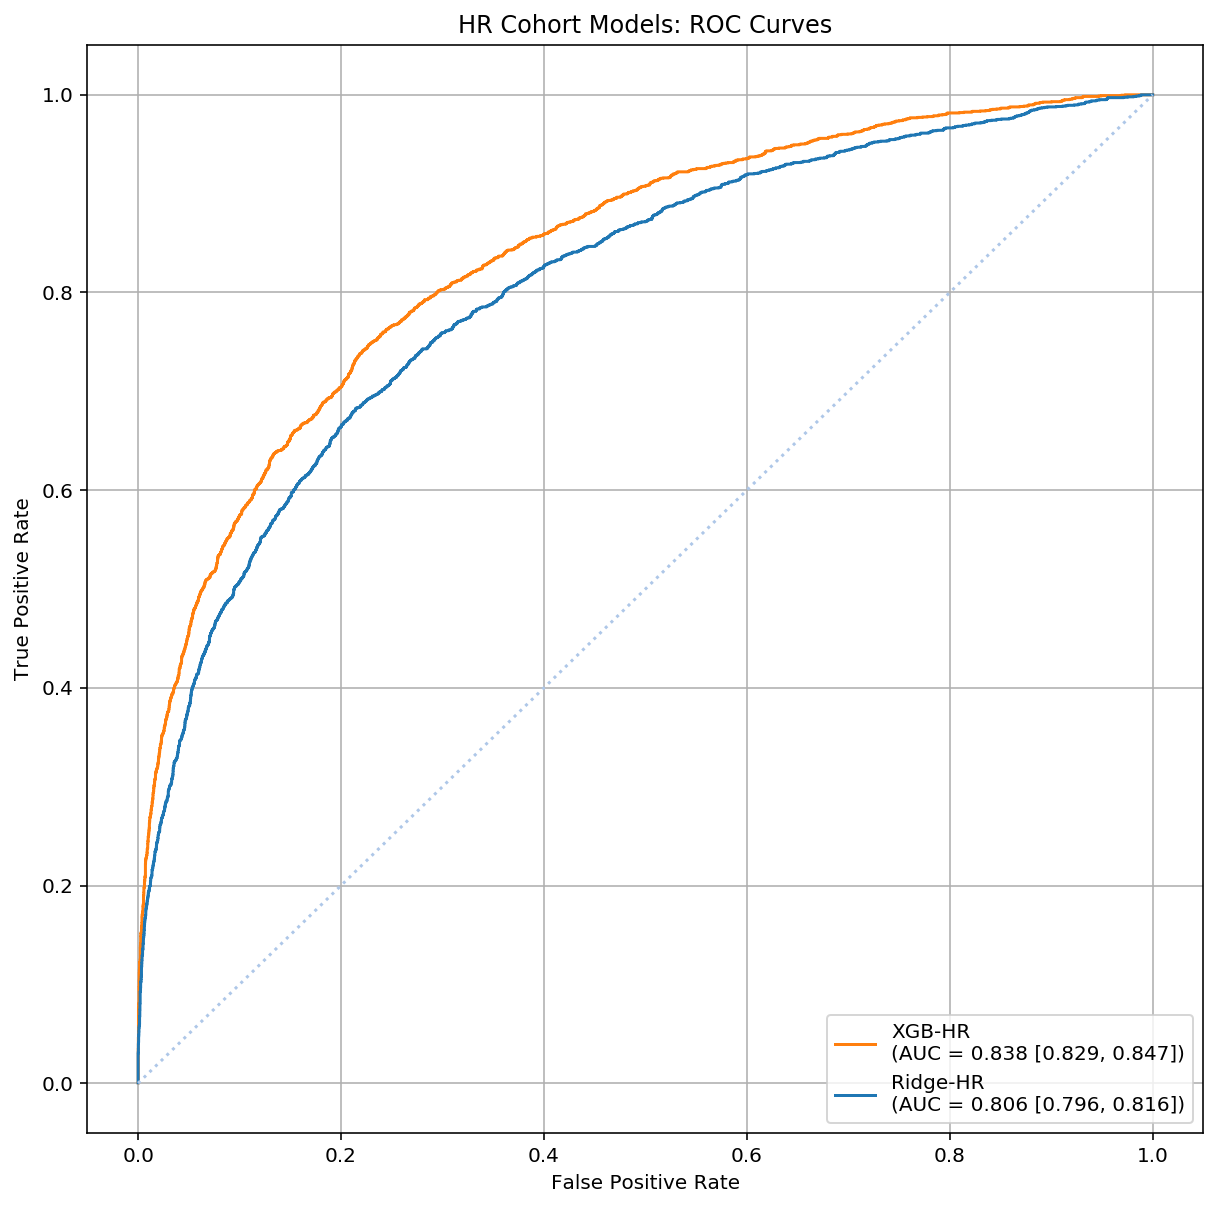

In [7]:
gen_auc_plot(models=[xgb_classifier_HR, ridge_classifier_HR], names=['XGB-HR', 'Ridge-HR'], 
             colors=[tableau20[2], tableau20[0]], title='HR Cohort Models: ROC Curves', X=test_X_HR, 
             y=test_y_HR, save_name='roc_HR')

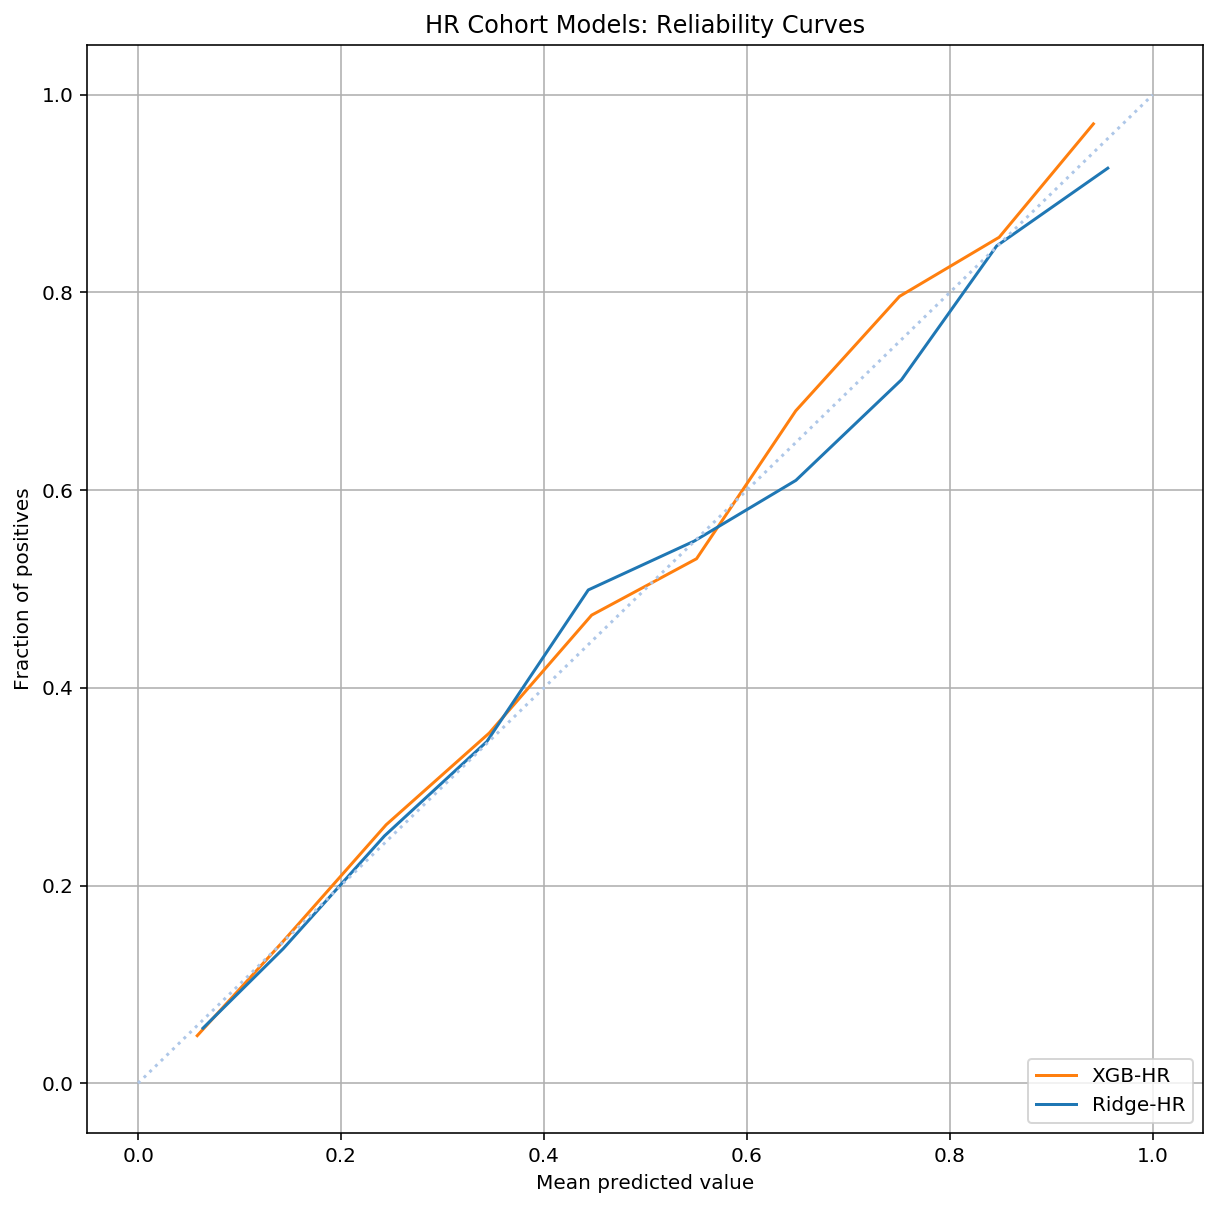

In [8]:
gen_calib_plot(models=[xgb_classifier_HR, ridge_classifier_HR], names=['XGB-HR', 'Ridge-HR'], 
             colors=[tableau20[2], tableau20[0]], title='HR Cohort Models: Reliability Curves', 
               X=test_X_HR, y=test_y_HR, save_name='rel_HR')

In [9]:
print('Ridge-HR OPR: {0:.3f} [{1:.3f}, {2:.3f}]'.format(*op_ratio(ridge_classifier_HR, test_X_HR, test_y_HR)))
print('XGB-HR OPR: {0:.3f} [{1:.3f}, {2:.3f}]'.format(*op_ratio(xgb_classifier_HR, test_X_HR, test_y_HR)))

Ridge-HR OPR: 0.985 [0.957, 1.015]
XGB-HR OPR: 1.009 [0.981, 1.037]


## 4 - Manuscript Graphics

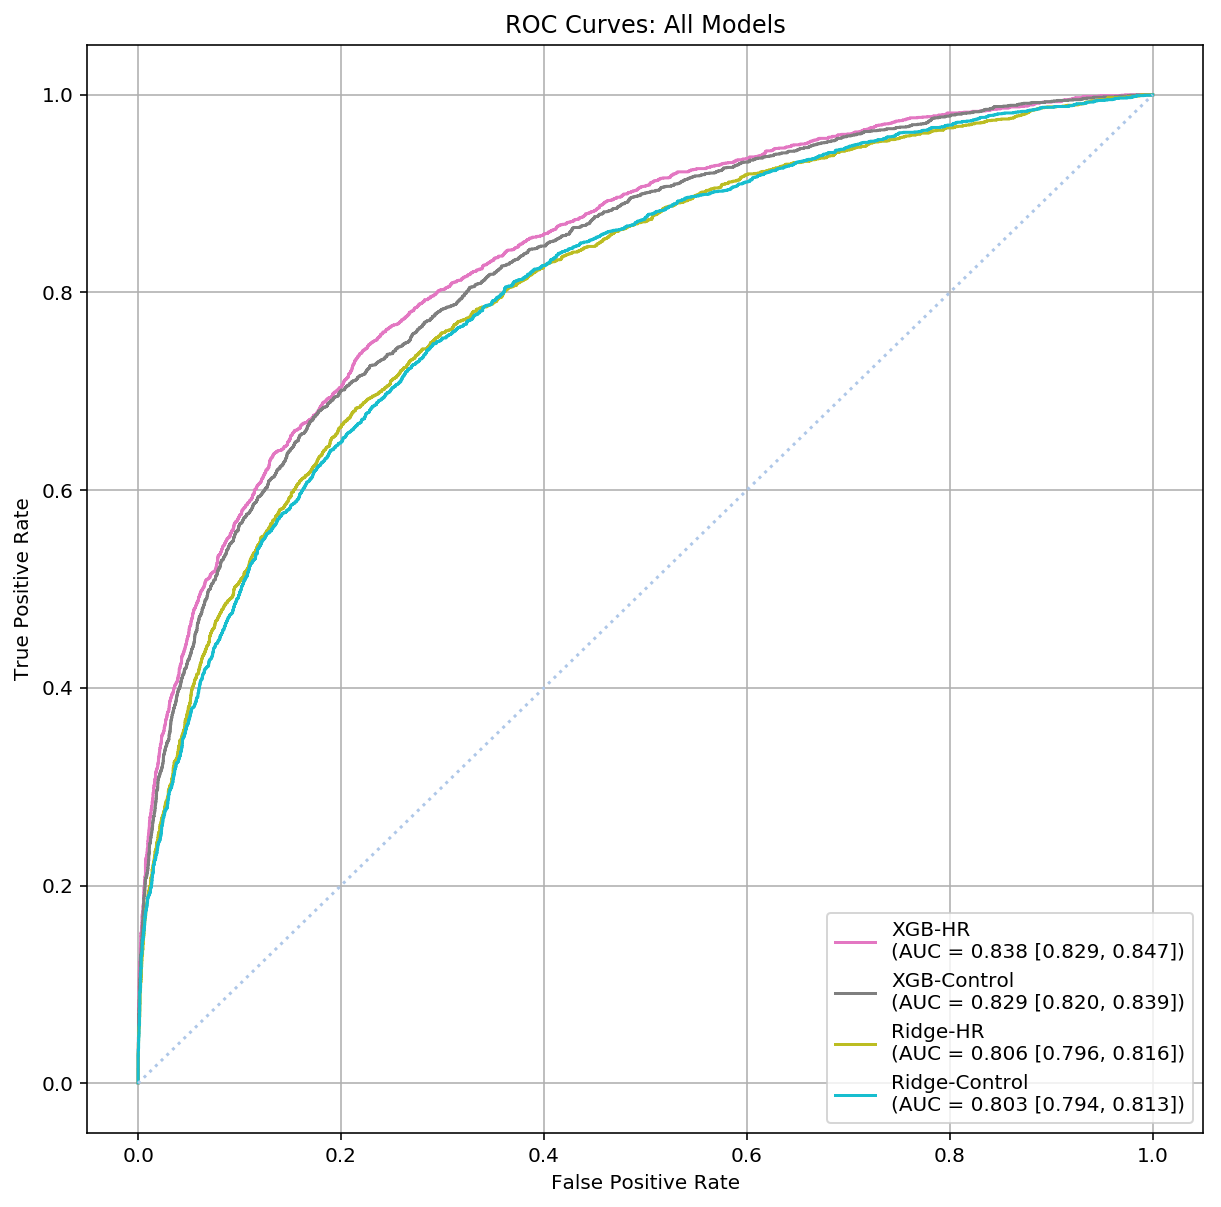

In [10]:
gen_auc_plot(models=[xgb_classifier_HR, xgb_classifier, ridge_classifier_HR, ridge_classifier], 
             names=['XGB-HR', 'XGB-Control', 'Ridge-HR', 'Ridge-Control'], title='ROC Curves: All Models',
             colors=[tableau20[12], tableau20[14], tableau20[16], tableau20[18]], X=test_X_HR, 
             y=test_y_HR, save_name='roc_all')

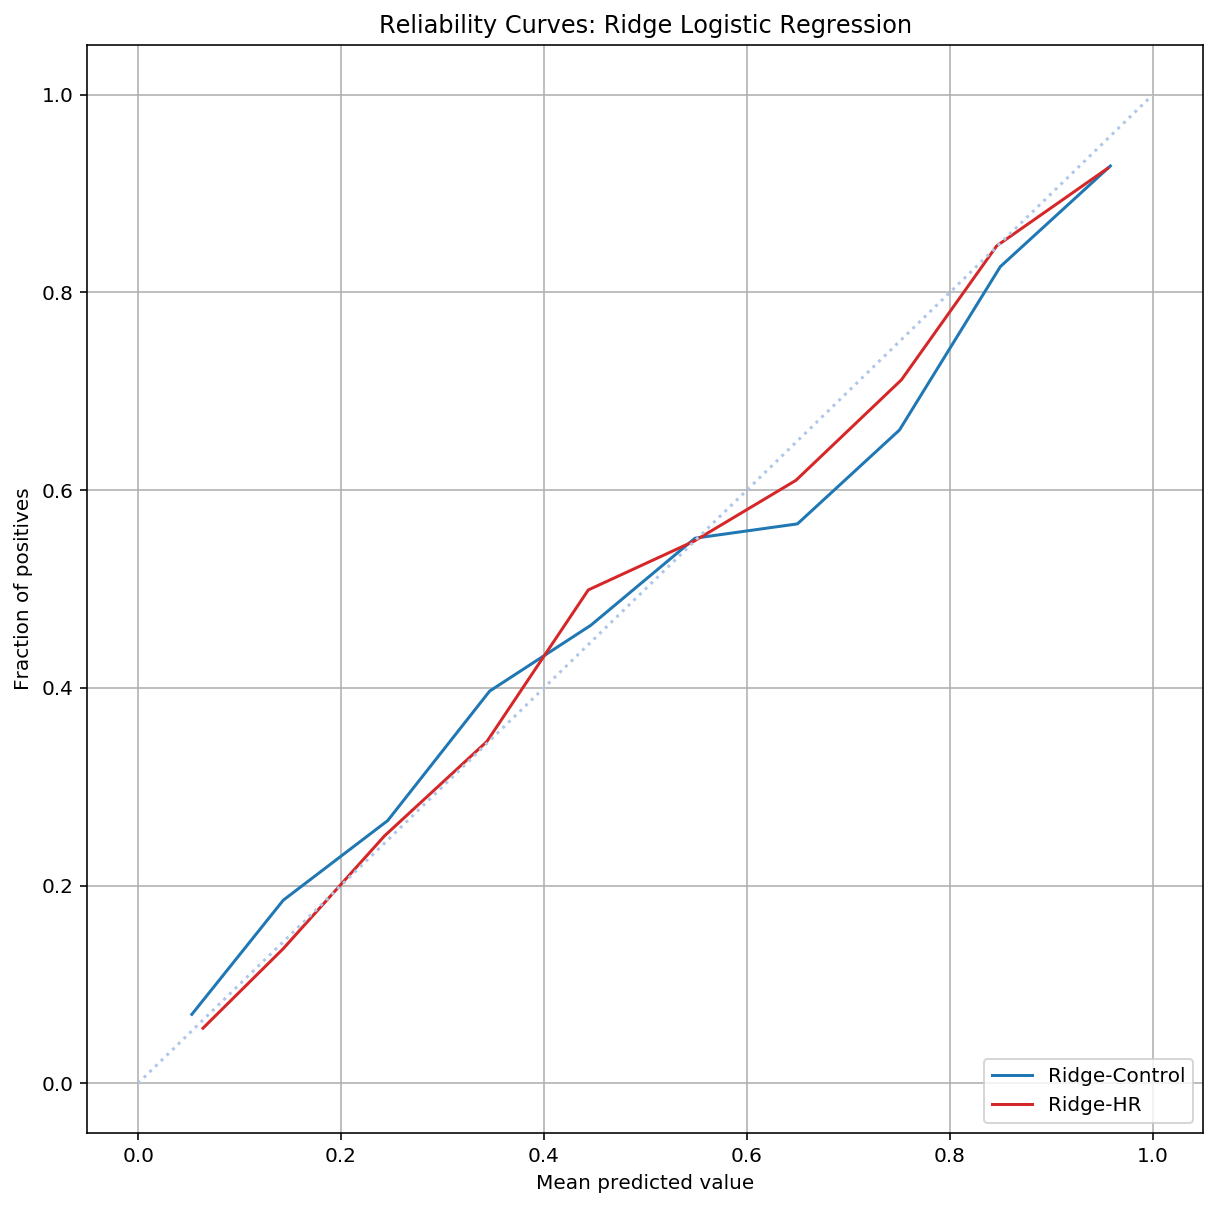

In [11]:
gen_calib_plot(models=[ridge_classifier, ridge_classifier_HR], 
             names=['Ridge-Control', 'Ridge-HR'], title='Reliability Curves: Ridge Logistic Regression',
             colors=[tableau20[0], tableau20[6]], X=test_X_HR, 
               y=test_y_HR, save_name='rel_ridge')

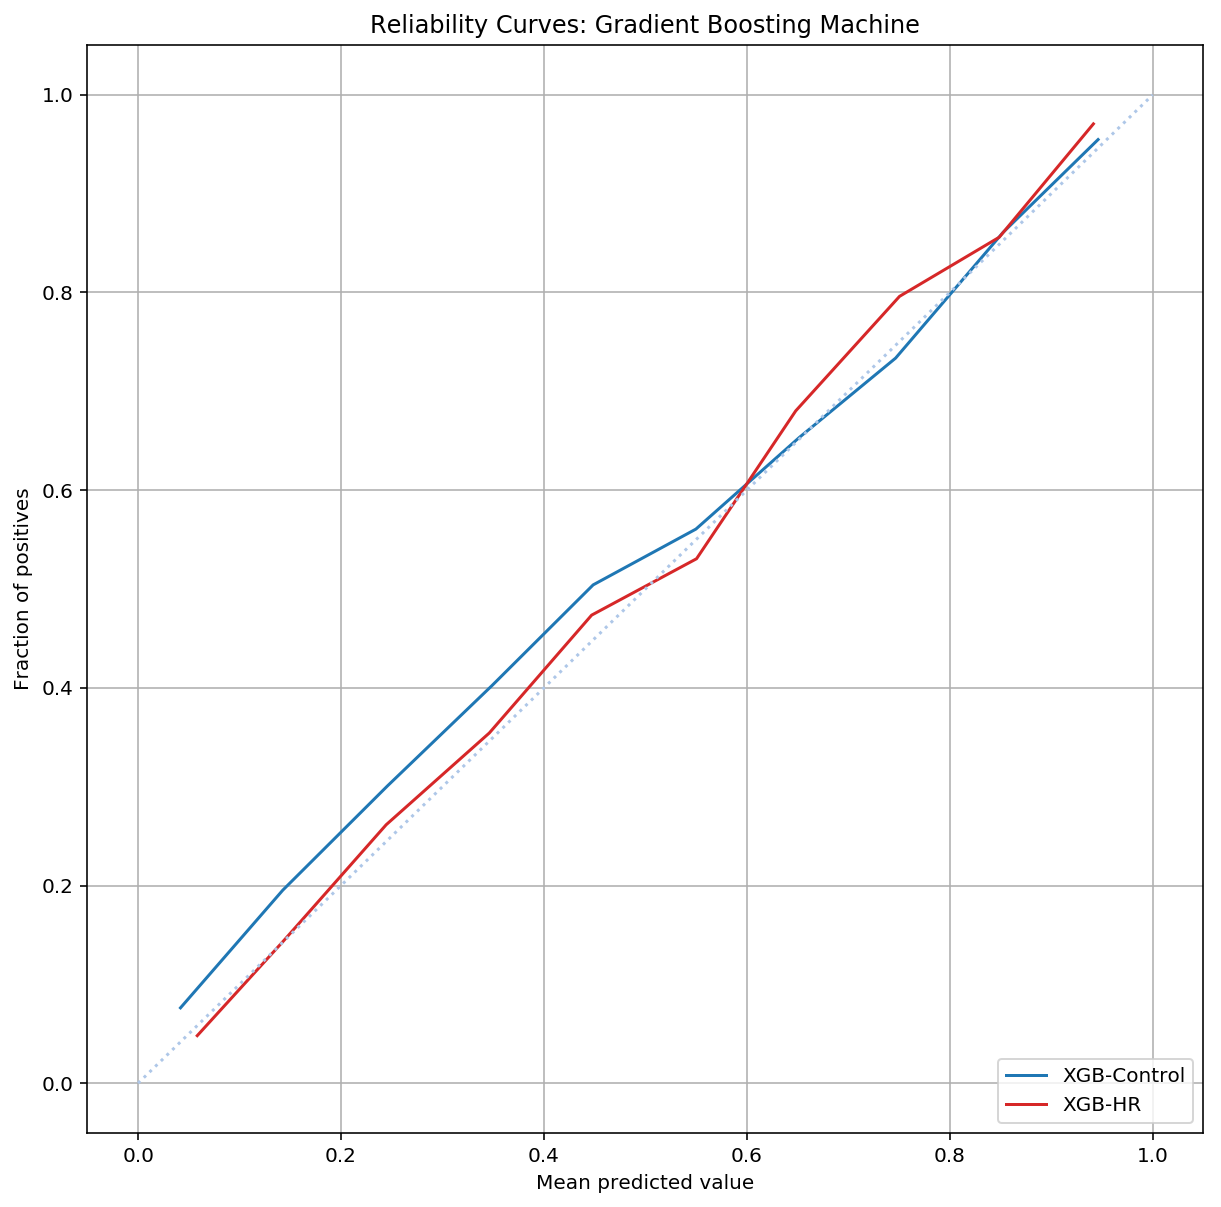

In [12]:
gen_calib_plot(models=[xgb_classifier, xgb_classifier_HR], 
             names=['XGB-Control', 'XGB-HR'], title='Reliability Curves: Gradient Boosting Machine',
             colors=[tableau20[0], tableau20[6]],  X=test_X_HR, 
               y=test_y_HR, save_name='rel_xgb')